<a href="https://colab.research.google.com/github/Molly-Abisage/Financial-inclusion-ip2/blob/master/week_2_ip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. DEFINING THE QUESTION


*    Research question definition




In [1]:
#How can we predict the individuals most likely to have or use bank accounts?

*   Define metric for success
*   Understand the context

*   Record the experimental design
*   Data relevance










# 2. READING  THE DATA

In [2]:
# Loading the plotting packages and analysis packages

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
#Read the data and preview it.

financial_df = pd.read_csv("/content/Financial Dataset - 1.csv", index_col=0)
financial_df.head()


,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
country,,,,,,,,,,,,
Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


# 3. CHECKING THE DATA

In [5]:
# Determining the size of our dataset
#
print('This dataset has ' + str(financial_df.shape[0]) + ' rows, and ' + str(financial_df.shape[1]) + ' columns')

This dataset has 23524 rows, and 12 columns


In [6]:
# Previewing the top of our dataset

financial_df.head(5)

,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
country,,,,,,,,,,,,
Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [8]:
# Previewing the bottom of our dataset
# 
financial_df.tail(5)

,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
country,,,,,,,,,,,,
Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [7]:
# Checking each column description
#

financial_df.describe(include='all')

,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
count,23524.000000,23524,23488,23509,23513,23496.000000,23490.000000,23490,23520,23492,23495,23494
unique,NaN,8735,2,2,2,NaN,NaN,2,6,5,7,10
top,NaN,uniqueid_1549,No,Rural,Yes,NaN,NaN,Female,Head of Household,Married/Living together,Primary education,Self employed
freq,NaN,4,20179,14338,17449,NaN,NaN,13859,12829,10739,12775,6428
mean,2016.979000,NaN,NaN,NaN,NaN,3.681818,38.804300,NaN,NaN,NaN,NaN,NaN
std,0.899669,NaN,NaN,NaN,NaN,2.279933,16.519996,NaN,NaN,NaN,NaN,NaN
min,2016.000000,NaN,NaN,NaN,NaN,0.000000,16.000000,NaN,NaN,NaN,NaN,NaN
25%,2016.000000,NaN,NaN,NaN,NaN,2.000000,26.000000,NaN,NaN,NaN,NaN,NaN
50%,2017.000000,NaN,NaN,NaN,NaN,3.000000,35.000000,NaN,NaN,NaN,NaN,NaN
75%,2018.000000,NaN,NaN,NaN,NaN,5.000000,49.000000,NaN,NaN,NaN,NaN,NaN


In [10]:
#Checking the dataset information and datatypes
#
financial_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23524 entries, Kenya to Uganda
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    23524 non-null  int64  
 1   uniqueid                23524 non-null  object 
 2   Has a Bank account      23488 non-null  object 
 3   Type of Location        23509 non-null  object 
 4   Cell Phone Access       23513 non-null  object 
 5   household_size          23496 non-null  float64
 6   Respondent Age          23490 non-null  float64
 7   gender_of_respondent    23490 non-null  object 
 8   The relathip with head  23520 non-null  object 
 9   marital_status          23492 non-null  object 
 10  Level of Educuation     23495 non-null  object 
 11  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 3.0+ MB


# 4. EXTERNAL DATA SOURCE VALIDATION

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

An example would be suppose that you're working with a dataset on the population of countries during the year 2016. Validating such information with an external reliable resource such as World Bank Data would be important step to providing credibility to your dataset. Have a look at the following link for an example. Link.

# 5. TIDYING THE DATASET


In [12]:
# Column cleaning
financial_df.columns= financial_df.columns.str.lower()
financial_df.head()

,year,uniqueid,has a bank account,type of location,cell phone access,household_size,respondent age,gender_of_respondent,the relathip with head,marital_status,level of educuation,type of job
country,,,,,,,,,,,,
Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [13]:
#Droping unnecessary columns

financial_df.drop(['uniqueid'], axis=1, inplace=True)

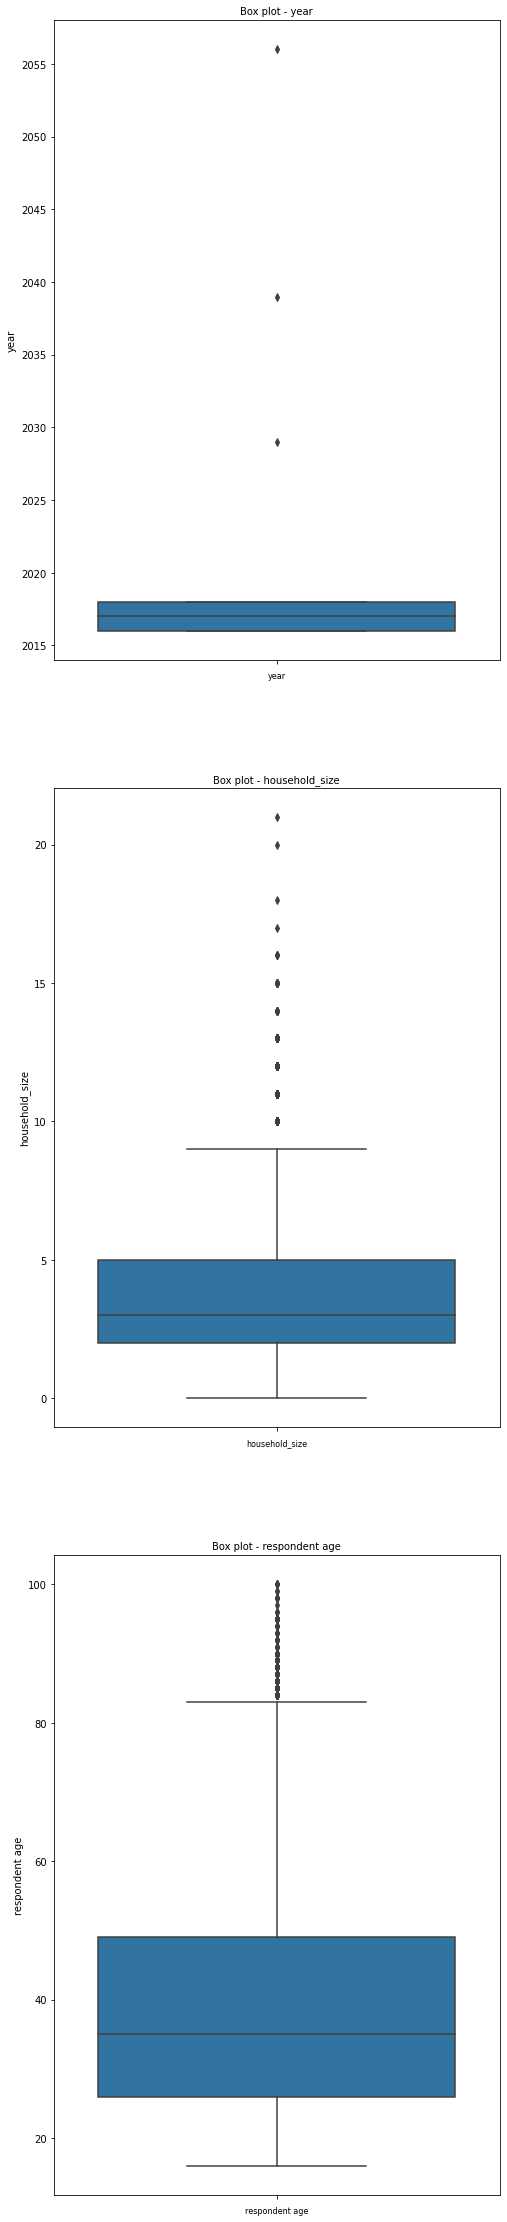

In [14]:
# Checking for Outliers
#
col_names = ['year','household_size',	'respondent age']
fig, ax = plt.subplots(len(col_names), figsize=(8,40))

for i, col_val in enumerate(col_names):

    sns.boxplot(y=financial_df[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()


In [15]:
#Removing Outliers
#
Q1 = financial_df.quantile(0.25)
Q3 = financial_df.quantile(0.75)
IQR = Q3-  Q1
print(IQR)

year               2.0
household_size     3.0
respondent age    23.0
dtype: float64


In [22]:
#Removing outliers found
#
new_financial_df = financial_df[~((financial_df < (Q1 - 1.5 * IQR)) |(financial_df> (Q3 + 1.5 * IQR))).any(axis=1)]
new_financial_df.shape
new_financial_df

,year,has a bank account,type of location,cell phone access,household_size,respondent age,gender_of_respondent,the relathip with head,marital_status,level of educuation,type of job
country,,,,,,,,,,,
Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
Kenya,2018,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
Kenya,2018,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...
Uganda,2018,No,Rural,Yes,0.0,20.0,Female,Child,Single/Never Married,Primary education,No Income
Uganda,2018,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
Uganda,2018,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income


In [19]:
# Anomalies

for i in financial_df.columns:
  print(i, financial_df[i].unique())
  print("%%%%%%%%")

year [2018 2029 2056 2016 2039 2017]
%%%%%%%%
has a bank account ['Yes' 'No' 0]
%%%%%%%%
type of location ['Rural' 'Urban' 0]
%%%%%%%%
cell phone access ['Yes' 'No' 0]
%%%%%%%%
household_size [ 3.  5.  8.  7.  1.  6.  4. 10.  2. 11.  9. 12. 16. 15. 13. 14. 21.  0.
 18. 17. 20.]
%%%%%%%%
respondent age [ 24.  70.  26.  34.  32.  42.  54.  76.  40.  69.  64.  31.  38.  47.
  27.  48.  25.  21.  18.  22.  58.  55.  62.  29.  35.  45.  67.  19.
  80.  66.  50.  33.  28.  51.  16.  17.  30.  37.  59.  65.  46.  56.
  52.  23.  43.  49.  44.  72.  53.  63.  39.  81.  78.  36.  20.  60.
  95.  71.  57.  85.  68.  41.  61.  75.  86.  73.   0.  93.  74.  88.
  90.  77.  84.  82.  89.  79.  83.  94.  87.  92.  91.  98.  97.  96.
  99. 100.]
%%%%%%%%
gender_of_respondent ['Female' 'Male' 0]
%%%%%%%%
the relathip with head ['Spouse' 'Head of Household' 'Other relative' 'Child' 'Parent'
 'Other non-relatives' 0]
%%%%%%%%
marital_status ['Married/Living together' 'Widowed' 'Single/Never Married'
 'D

In [11]:
#Identifying Missing Data
#
financial_df.isnull().sum()

year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [17]:
#Replacing the missing values with 0

financial_df.fillna(0, inplace=True)

# 6. EXPLORATORY DATA ANALYSIS

### A. UNIVARIATE ANALYSIS

In [42]:
new_financial_df.head()

,year,has a bank account,type of location,cell phone access,household_size,respondent age,gender_of_respondent,the relathip with head,marital_status,level of educuation,type of job
country,,,,,,,,,,,
Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
Kenya,2018,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
Kenya,2018,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


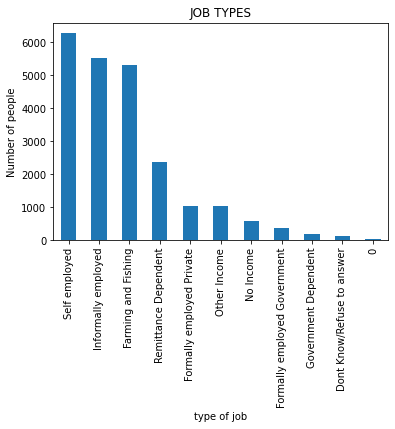

In [28]:
# Plotting bargraph for categorical column Type of Job
#
new_financial_df['type of job'].value_counts().plot.bar(title='JOB TYPES')

plt.ylabel('Number of people')
plt.xlabel('type of job')
plt.xticks(rotation = 90)
plt.show();

The bar plot shows comparisons among these discrete categories,
the x-axis showing the job types and the y-axis the number of pleople.
The graph shows that most people are self employed in all the countries.


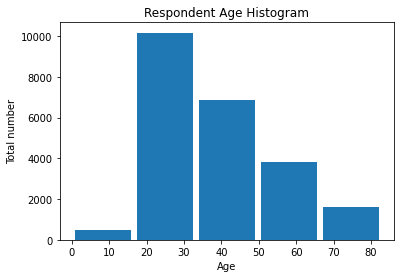

In [61]:
# Plotting age of respondents.
#
#
new_financial_df['respondent age'].value_counts().plot.hist
age=new_financial_df['respondent age']
plt.hist(age, bins=5, histtype='bar', rwidth=0.9)
plt.xlabel('Age')
plt.ylabel('Total number')
plt.title('Respondent Age Histogram')
plt.show()

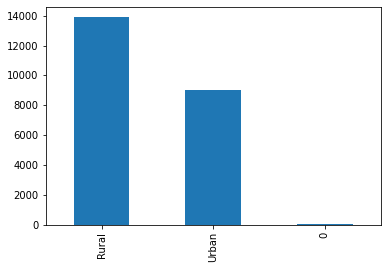

In [59]:
# Plotting type of location
#
new_financial_df['type of location'].value_counts().plot.bar()

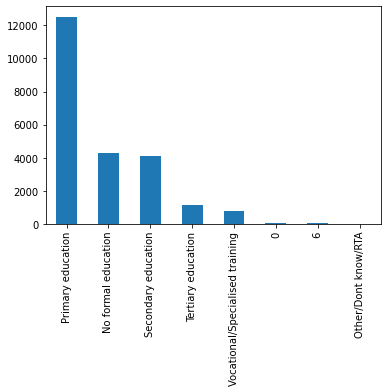

In [54]:
#Level of Education
#
new_financial_df['level of educuation'].value_counts().plot.bar()

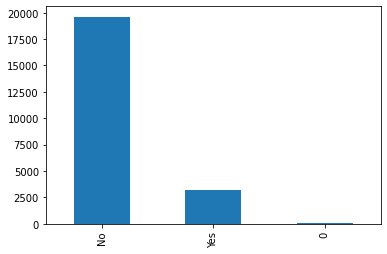

In [56]:
#Bank Accounts Bar-graph
#
new_financial_df['has a bank account'].value_counts().plot.bar()

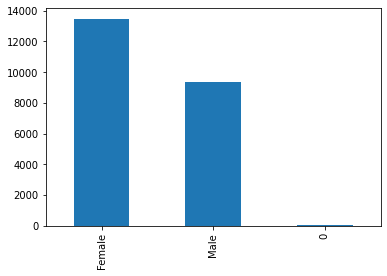

In [57]:
# Bar plot on respondents gender.
#  From the graph we can tell that femals are the majority respondents.
#
new_financial_df['gender_of_respondent'].value_counts().plot.bar()

In [62]:
new_financial_df['household_size'].mean()


3.5691830764528665

In [63]:
new_financial_df['household_size'].mode()

0    2.0
dtype: float64

In [64]:
new_financial_df['respondent age'].mean()

38.28983102650308

In [65]:
new_financial_df['respondent age'].median()

35.0

In [66]:
new_financial_df['respondent age'].mode()

0    30.0
dtype: float64

CONCLUSIONS
-Many respondents stay in rural areas, aged between 20-40, and many respondents are self-employed, also with the highest level of education in all countries being Primary education.

B. BIVARIATE ANALYSIS

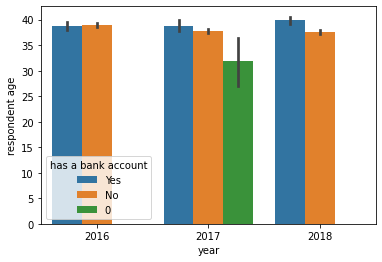

In [41]:
sns.barplot(x = 'year', y = 'respondent age', data = new_financial_df, hue = 'has a bank account')

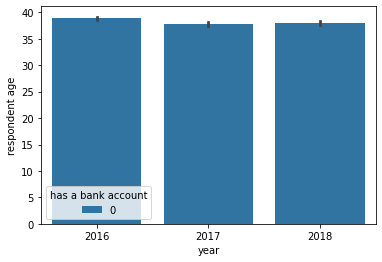

In [80]:
sns.barplot(x = 'year', y = 'respondent age', data = new_financial_df, hue = 'has a bank account')

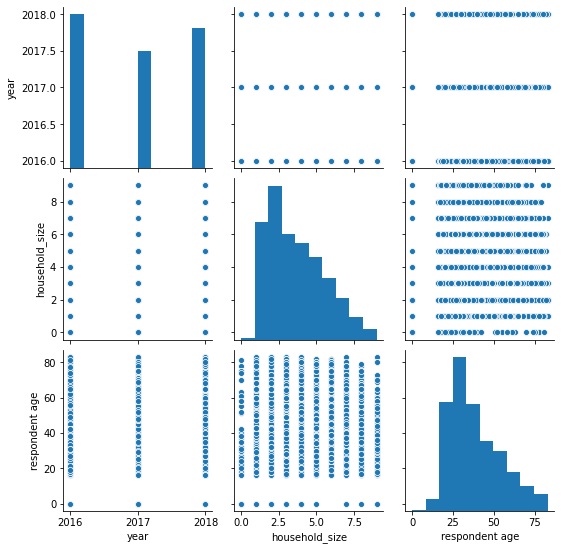

In [67]:
sns.pairplot(new_financial_df)
plt.show()

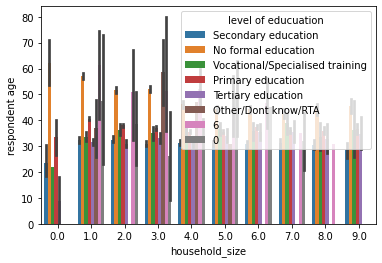

In [81]:
sns.barplot(x = 'household_size', y = 'respondent age', data = new_financial_df, hue = 'level of educuation')

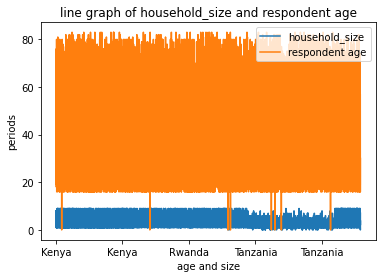

In [82]:
new_financial_df[['household_size', 'respondent age']].plot()
plt.title("line graph of household_size and respondent age")
plt.xlabel("age and size")
plt.ylabel("periods")
plt.show()

In [86]:
pearson_coeff = new_financial_df["household_size"].corr(new_financial_df["respondent age"], method="pearson") 
print(pearson_coeff)
# Checking whether you have to define the pearson
coeff = new_financial_df["household_size"].corr(new_financial_df["respondent age"]) 
print(coeff)

-0.10346166267651177
-0.10346166267651177


C. MULTIVARIATE ANALYSIS

In [73]:
def bank_account_num(x):
    if x=="Yes":
        return 1
    else:
        return 0

def gender_num(x):
    if x=="Male":
        return 1
    else:
        return 0
    
def location_num(x):
    if x=="Urban":
        return 1
    else:
        return 0
    
def phone_num(x):
    if x=="Yes":
        return 1
    else:
        return 0
    
def phone_num(x):
    if x=="Yes":
        return 1
    else:
        return 0
    

In [78]:
new_financial_df['has a bank account']=new_financial_df['has a bank account'].apply(lambda x:bank_account_num(x))
new_financial_df['gender_of_respondent']=new_financial_df['gender_of_respondent'].apply(lambda x:gender_num(x))
new_financial_df['type of location']=new_financial_df['type of location'].apply(lambda x:location_num(x))
new_financial_df['cell phone access']=new_financial_df['cell phone access'].apply(lambda x:phone_num(x))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [79]:
new_financial_df.head()

,year,has a bank account,type of location,cell phone access,household_size,respondent age,gender_of_respondent,the relathip with head,marital_status,level of educuation,type of job
country,,,,,,,,,,,
Kenya,2018,0,0,1,3.0,24.0,0,Spouse,Married/Living together,Secondary education,Self employed
Kenya,2018,0,0,0,5.0,70.0,0,Head of Household,Widowed,No formal education,Government Dependent
Kenya,2018,0,1,1,5.0,26.0,0,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
Kenya,2018,0,0,1,5.0,34.0,0,Head of Household,Married/Living together,Primary education,Formally employed Private
Kenya,2018,0,1,0,8.0,26.0,0,Child,Single/Never Married,Primary education,Informally employed


# 7. IMPLEMENTING THE SOLUTION**

In [ ]:
#IMPLEMENTING

# 8. CHALLENGING THE SOLUTION